In [55]:
#pip install statsforecast==0.6.0

In [56]:
# import pytorch
import torch
import numpy as np

In [59]:
 # import pandas for dataFrame
 # import darts for timeSeries
import pandas as pd
from darts import TimeSeries

In [18]:
# declare x and y
# create an Tensor
x = torch.tensor([[1.0,2.0,3.0,4.0,5.0,6.0]])   # tensor are similar to array and matrices
y = torch.tensor([[7.0,8.0,9.0,10.0,11.0,12.0]])

In [19]:
# display the array
print(x)
print(y)

tensor([[1., 2., 3., 4., 5., 6.]])
tensor([[ 7.,  8.,  9., 10., 11., 12.]])


In [20]:
# declare a few more arrays
z = torch.tensor([[5.0,10.0,15.0]])
a = torch.tensor([[1.0,2.0,3.0]])

In [21]:

print(x + y)

tensor([[ 8., 10., 12., 14., 16., 18.]])


In [22]:
print(x - y)

tensor([[-6., -6., -6., -6., -6., -6.]])


In [23]:
print(x)
print(z + a )
# Note : arrays have to match up
# print(z + x) willn't run because array are different

tensor([[1., 2., 3., 4., 5., 6.]])
tensor([[ 6., 12., 18.]])


In [24]:
print(x * y)

tensor([[ 7., 16., 27., 40., 55., 72.]])


In [25]:
# Use GPU or CPU power
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = x.to(device)
y = y.to(device)
print(x.device)
print(y.device)

cpu
cpu


### Creating a Simple Linear Model

In [26]:
import torch.nn as nn

# I just gave it the name simple model
# the feature is the input
simple_model = nn.Linear(in_features=1, out_features=1)


x = torch.tensor([[2.0]])     # 2.0 is the value we are inputing
output = simple_model(x)
print(output)

tensor([[1.4222]], grad_fn=<AddmmBackward0>)


In [27]:
# This is the setting the model is trying to predict
target = torch.tensor([[4.0]])

 # think of this as scorekeeper predicting the Mean Square Error Loss
loss_fn =nn.MSELoss()
                                    # Model predicts our input (0.2)
                                    # the target we want to achive (0.4)
                                    # it calulates

 # See Explaination
optimizer = torch.optim.SGD(simple_model.parameters(),lr=0.01)
loss = loss_fn(output,target)
print('loss: ',loss.item())

loss:  6.645020008087158


Explaination :  
Think of the model as a soccor player let's name him bob and the Optimizer as Coach Smith. Bob the model has muscles( weights and biases( but doesn't know how them. The loss function represent the distance from the player to the goal post. Coach Smith ( the Optimizer ) watches every kick the bob ( the model) does, coach smith is there to tell bob what has to change in order for him to his goal of scoring a point.


For example Let's say bob kicks the ball and it goes a few feet ( loss function is too high ), coach smith tells bob "That's too short, you need to kick the ball harder and use more power on your foot" . Bob tries again and lets say he kicks the ball halfway ( loss function is close but the goal is still far away), coach smith says " that's better but this time, adjust how you aim the ball when your kicking it". Now bob tries again and let's say he scores a goal ( loss function is small) The coach tells bob "At a boy son, that's how you do it".

Every time bob pracices ( aka epoch) he listens to feedback (the loss function ) coach updates how bob kicks (via optimizer) and bob gets better.

In [28]:
 for epoch in range(10):
  output = simple_model(x)
  loss = loss_fn(output,target)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 6.6450
Epoch 2, Loss: 5.3825
Epoch 3, Loss: 4.3598
Epoch 4, Loss: 3.5314
Epoch 5, Loss: 2.8605
Epoch 6, Loss: 2.3170
Epoch 7, Loss: 1.8767
Epoch 8, Loss: 1.5202
Epoch 9, Loss: 1.2313
Epoch 10, Loss: 0.9974


The Epoch represent one complete pass throught the entire training dataset. As you can see when bob started kicking the ball the first time he was way off at a 11.33 ( this represent how far he was from the goal post) once he gets down to attempt #10, he was way closer than attempt #1

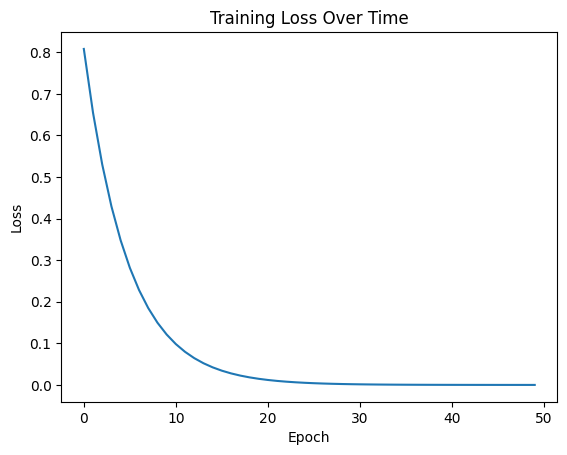

In [29]:
import matplotlib.pyplot as plt

losses = []

for epoch in range(50):
  output = simple_model(x)
  loss = loss_fn(output, target)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()